# Project 3B:  Canny Filter

The Sobel operator used in Part A of this project is good, but tends to over-produce edges. The Canny operator is a common approach to isolating edge pixels.  As demonstrated by lecture and readings, there are five steps.  In your `project3.py` file, implement each of the steps and test below.

---

### Step 1: Apply a Gaussian filter to smooth the image.

A nice 5x5 kernel like those used in Project 2 should be good.  Show your results below

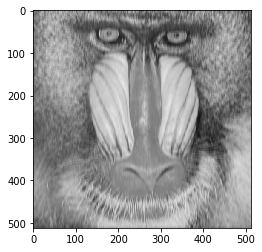

In [1]:
import numpy as np
import cv2
from project3 import *
import matplotlib.pyplot as plt
import math
from utils import load_image, save_image
%matplotlib inline


img = cv2.imread("images/demo.pgm", 0)

# kernels
vertical_sobel = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
horizontal_sobel = np.asarray([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gaussian = cv2.getGaussianKernel(ksize=10, sigma=5)

# blur image with Gaussian filter
img = cv2.filter2D(img, cv2.CV_16S, gaussian)
plt.figure()
plt.imshow(img,cmap='gray', vmin=0, vmax=255);plt.show()

---

### Step 2: Find the gradient

Use a sobel operator to find the intensity gradient of the image -- that is, the edges

* You'll need to calculate both the magnitude (as in part A)

$G = \sqrt{G_{x}^{2} + G_{y}^{2}}$

* You'll also need to calculate the orientation of the edge:

$ \theta = arctan(\frac{G_{y}}{G_{x}}) $

It is up to your discretion what format you store this information, but keep in mind it is on a per-pixel level.

Visualize the magnitude and orientation of the edges in an image in the cell below


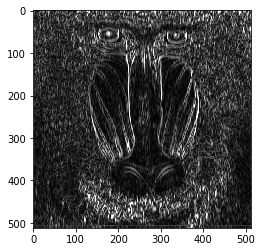

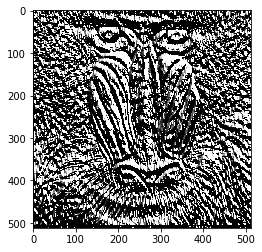

In [2]:
v_dst = cv2.filter2D(img, cv2.CV_16S, vertical_sobel)
h_dst = cv2.filter2D(img, cv2.CV_16S, horizontal_sobel)

magnitudes = np.hypot(v_dst, h_dst)
plt.figure()
plt.imshow(magnitudes,cmap='gray', vmin=0, vmax=255);plt.show()

orientations = calculate_orientation(v_dst, h_dst)
plt.imshow(orientations,cmap='gray', vmin=0, vmax=1);plt.show()

---

### Step 3: Non Maximum Suppression 

The idea here is that some gradient edges can still be many pixels wide "thick", whereas we really only want edges to be one pixel wide.  We can resolve this by iterating through each *magnitude* pixel, and compare its value to the values of its neighbors along the orientation of the edge (as calculated by your orientation image).  We only care about four "cardinal" directions.

* if the (rounded) angle is $0^{\circ}$, compare the pixel to its east and west neighbors, and zero it out if it non-maximal
* if the angle is $90^{\circ}$, compare to the north and west neighbors
* follow the same logic for $45^{\circ}$ (NE and SW) and $135^{\circ}$ (NW and SE)

In the event that a pixel's magnitude is lower than its neighbors, just set it to zero.  If it is maximal, leave it alone.  Show the result of your testing below.

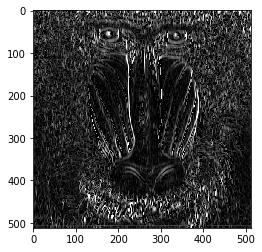

In [3]:
n_m_sup = non_max_suppression(magnitudes, orientations)
plt.imshow(n_m_sup,cmap='gray', vmin=0, vmax=255);plt.show()

---

### Step 4: Set two thresholds

We next need to determine a "high" --  $T_{hi}$  -- and "low"  -- $T_{low}$ --  threshold value for edge pixels.  The idea here is that we can now classify magnitude pixels into three categories:

* strong:  ($ G \gt T_{hi}$)- definitely an edge
* weak:  ($ T_{low} \lt G \lt T_{hi}$) - possibly an edge
* discard: ($G \lt T_{low}$) - too weak, simply discard

Unfortunately, these values have to be determined through emprical trial and error, and can vary from image to image.  

Try having $T_{hi} = 1.5 \times T_{low}$

Test for a range of different values, and show them side by side



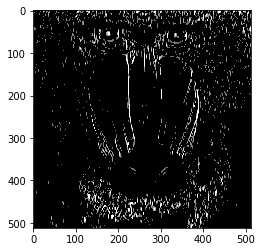

In [4]:
t_h = 200
t_l = 100
threshold_magnitudes = np.vectorize(magnitude_threshold)(n_m_sup, t_h, t_l)
plt.imshow(threshold_magnitudes,cmap='gray', vmin=0, vmax=255);plt.show()

--- 

### Step 5: Edge Tracking 

Follow the following "blob tracking" algorithm:  iterate through all the weak magnitude pixels and look at its eight neighbors.  If at least one of its neighbors is a strong pixel, then the weak edge pixel probably belongs to a strong edge, and keep it.  Otherwise, discard it. Demonstrate your testing below.

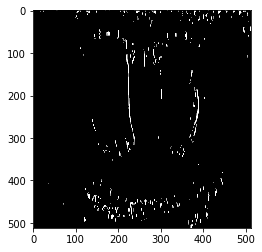

In [5]:
final = track_edges(threshold_magnitudes, t_h, t_l)
plt.imshow(final,cmap='gray', vmin=0, vmax=255);plt.show()

### Conclusion:

Wrap everything together in a function called Canny inside of project3.py.  You should use the same API signature as the openCV Canny() edge detector.  Show your testing below.

In [6]:
import numpy as np
import cv2
from project3 import *
import matplotlib.pyplot as plt
import math
from utils import load_image, save_image
%matplotlib inline

img = cv2.imread("images/demo.pgm", 0) 
plt.imshow(myCanny(img, 200, 100),cmap='gray', vmin=0, vmax=255);plt.show()

NameError: name 'myCanny' is not defined